In [1]:
# import statements
import numpy as np
import dicom
import cv2 
import matplotlib.pyplot as plt
from collections import defaultdict
import scipy.misc as misc
import sys
import os
sys.path.append("..")
from AlgoEngine.utils import getMeanTargetDose, getImageBlock, getContours, convertROIToCTSpace
from General.testing_utils import getContourInputs

## Inputs to Function + Function

We combine both input and function for testing reasons- we test  this function by determining what the DVH is
Note that the DICOM dose object has a DVH for everything marked as an "Organ" or an "PTV", but not avoidance.

In [17]:
base = os.path.dirname(os.path.dirname(os.path.join(os.getcwd()))) + '/data/'
StudyID = 'UCLA_PR_32'
structureset = dicom.read_file(base + StudyID + '/structureset.dcm')

In [18]:
dose_data = dicom.read_file(base + StudyID + "/dose.dcm")
dose_grid = np.array(dose_data.pixel_array)

x_spacing = np.array(dose_data.PixelSpacing[0]).astype(np.uint8)
y_spacing = np.array(dose_data.PixelSpacing[1]).astype(np.uint8)

In [19]:
dose_z = float(dose_data.ImagePositionPatient[2])
ctFilenames = [fl for fl in os.listdir(base + StudyID) if 'CT.' in fl]
ct_sample = dicom.read_file(base + StudyID + '/' + ctFilenames[0])
block_shape = (ct_sample.Rows, ct_sample.Columns, len(ctFilenames))

ct_coords = None

for i, fl in enumerate(ctFilenames):
    ct_struct = dicom.read_file(base + StudyID + '/' + fl)
    if(float(ct_struct.ImagePositionPatient[2]) == dose_z):
        ct_coords = ct_struct.ImagePositionPatient
        ct_spacing = ct_struct.PixelSpacing
                            

In [97]:
from dicompylercore import dicomparser, dvh, dvhcalc
heartdvh = dvh.DVH.from_dicom_dvh(dose_data, 11)
x = heartdvh.cumulative
x.counts.tostring()

DVH(cumulative, 1946 bins: [0.0:19.460000000000242] Gy, volume: 25621.808215590598 cm3, name: None, rx_dose: 0 Gy)

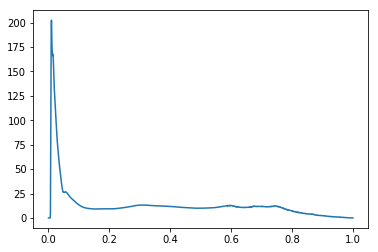

In [75]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(bincenters, dose_array[:-1, 1], label="ROI")